In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import sys
import numpy as np
import os
import csv
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras import regularizers
from numpy import array
from numpy import asarray
from numpy import zeros

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/com_reviews_MP.csv',  sep=',')
df

,Unnamed: 0,Review_Text,Sentiment_Class
0,0,Bro njn 13 pro edukkan noknond suggestions??,Not_relevant
1,1,Tech inte ambassador 🤘😉🔥🔥🔥,Positive
2,2,Ivan aradey 😳,Negative
3,3,Bro 13 pro 256 gb green available anno,Neutral
4,4,samsung company ethra tharunundh,Neutral
...,...,...,...
4153,4153,എന്നാൽ നിനക്ക് rs 5000 രൂപ സമ്മാനം relieved face,Not_relevant
4154,4154,സുഹുർത്തെ tesla pi ഫോൺ ഇറങ്ങിയതോടെ apple i pho...,Mixed Feelings
4155,4155,real me 10 pro vs redmi note 12 pro വീഡിയോ ചെയ...,Not_relevant
4156,4156,ഇതിന്റെ google dailer and messaging app miui ട...,Neutral


In [ ]:
column_to_drop = 'Unnamed: 0'
df = df.drop(column_to_drop, axis=1)
df

,Review_Text,Sentiment_Class
0,Bro njn 13 pro edukkan noknond suggestions??,Not_relevant
1,Tech inte ambassador 🤘😉🔥🔥🔥,Positive
2,Ivan aradey 😳,Negative
3,Bro 13 pro 256 gb green available anno,Neutral
4,samsung company ethra tharunundh,Neutral
...,...,...
4153,എന്നാൽ നിനക്ക് rs 5000 രൂപ സമ്മാനം relieved face,Not_relevant
4154,സുഹുർത്തെ tesla pi ഫോൺ ഇറങ്ങിയതോടെ apple i pho...,Mixed Feelings
4155,real me 10 pro vs redmi note 12 pro വീഡിയോ ചെയ...,Not_relevant
4156,ഇതിന്റെ google dailer and messaging app miui ട...,Neutral


In [ ]:
text=df['Review_Text']
labels=df['Sentiment_Class']

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def count_sentences_in_column(dataframe, column_name):
    total_sentences = 0
    for text in dataframe[column_name]:
        sentences = nltk.sent_tokenize(text)
        total_sentences += len(sentences)
    return total_sentences

column_name = 'Review_Text'  # Replace this with the actual column name in your DataFrame
sentence_count = count_sentences_in_column(df, column_name)
print(f"Total number of sentences in column '{column_name}': {sentence_count}")

def count_words_in_column(dataframe, column_name):
    total_words = 0
    for text in dataframe[column_name]:
        words = text.split()  # Splitting text into words
        total_words += len(words)
    return total_words

column_name = 'Review_Text'  # Replace this with the actual column name in your DataFrame
word_count = count_words_in_column(df, column_name)
print(f"Total number of words in column '{column_name}': {word_count}")

def count_unique_words_in_column(dataframe, column_name):
    unique_words = set()  # Set to store unique words
    for text in dataframe[column_name]:
        words = text.split()  # Splitting text into words
        unique_words.update(words)  # Adding words to the set

    return len(unique_words)

column_name = 'Review_Text'  # Replace this with the actual column name in your DataFrame
unique_word_count = count_unique_words_in_column(df, column_name)
print(f"Total number of unique words in column '{column_name}': {unique_word_count}")


def find_longest_sentence(dataframe, column_name):
    longest_sentence = ''
    max_word_count = 0

    for text in dataframe[column_name]:
        sentences = text.split('.')  # Splitting text into sentences
        for sentence in sentences:
            words = sentence.split()  # Splitting sentence into words
            word_count = len(words)
            if word_count > max_word_count:
                max_word_count = word_count
                longest_sentence = sentence.strip()  # Removing extra spaces

    return longest_sentence, max_word_count

column_name = 'Review_Text'  # Replace this with the actual column name in your DataFrame
longest_sentence, word_count = find_longest_sentence(df, column_name)
print(f"Longest sentence in column '{column_name}':")
print(longest_sentence)
print(f"Number of words in the longest sentence: {word_count}")


def calculate_average_sentence_length(dataframe, column_name):
    total_sentences = 0
    total_words = 0

    for text in dataframe[column_name]:
        sentences = nltk.sent_tokenize(text)
        total_sentences += len(sentences)
        for sentence in sentences:
            words = nltk.word_tokenize(sentence)
            total_words += len(words)

    if total_sentences == 0:  # To handle the case where there are no sentences
        return 0

    average_sentence_length = total_words / total_sentences
    return average_sentence_length

column_name = 'Review_Text'  # Replace this with the actual column name in your DataFrame
avg_sentence_length = calculate_average_sentence_length(df, column_name)
print(f"Average sentence length in column '{column_name}': {avg_sentence_length:.2f} words")

Total number of sentences in column 'Review_Text': 4423
Total number of words in column 'Review_Text': 62120
Total number of unique words in column 'Review_Text': 17320
Longest sentence in column 'Review_Text':
ഐഫോൺ 12 /12പ്രൊ മാക്സ് hdr 10 bit dolby vision വീഡിയോ റെക്കോർഡിങ്നെ കുറിച്ചു നമ്മൾ ചില കാര്യങ്ങൾ മനസിലാക്കേണ്ടത്ഒരു നോർമൽ കസ്റ്റമർ വെച്ച് നോക്കുവാണേൽ hdr dolby vision വലിയ സംഭവമായി തോന്നില്ലപക്ഷെ വീഡിയോഗ്രാഫി il ഉള്ളവർക്ക് അലെൽ സിനിമ ഫീൽഡ് ഉള്ളവർക്ക് ഹ്യൂജ് അച്ചീവേമെന്റ് ആണ്കരണoworlds most advanced dynamic hdr ആണ് dolby vision dolby vision special is its use of dynamic metadata unlike hdr10 ആൻഡ് hdr 10 plus which is an open format dolby vision uses dynamic metadata to tonemap the image on a scenebyscene or framebyframe basisഇന്ന് real time 10 bit hdr dolby visionൽ റെക്കോർഡ് ചെയ്യാൻ പറ്റുന്ന ഒരു സിനിമ ക്യാമറ/ പ്രഫഷണൽ ക്യാമറ ഇല്ലഅപ്പോൾ നിങ്ങൾ ഓർക്കും dolby വിഷൻ ഇൽ സിനിമ ഉണ്ടാലോ എന്ന് ശരിയാണ് പക്ഷെ സിനിമ ക്യാമറ പോലും വീഡിയോ എടുത്തു പിന്നിട് എഡിറ്റിംഗ് സോഫ്റ്റ്‌വെയർ ഇൽ ഓരോ ഫ്രെയിം ക

<Axes: ylabel='Sentiment_Class'>

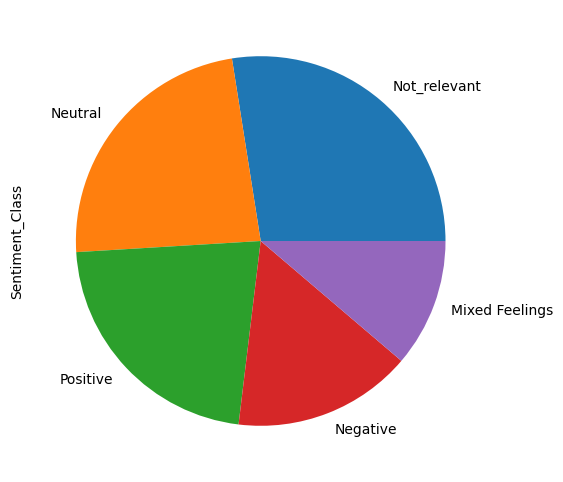

In [ ]:
### LABEL DISTRIBUTION ###

df.Sentiment_Class.value_counts().plot.pie(figsize=(6,6))

In [ ]:
labels.value_counts()

# Positive          307
# Negative          138
# Neutral           136
# Mixed Feelings    125
# Not_relevant       90

Not_relevant      1143
Neutral            976
Positive           920
Negative           652
Mixed Feelings     467
Name: Sentiment_Class, dtype: int64

In [ ]:
df_tokens = pd.read_csv('/content/drive/MyDrive/MP_com_review_tokens.csv',  sep=',')
df_tokens

,Unnamed: 0,Review_text_tokens,Sentiment_Class,Transliterated_text_tokens
0,0,"['bro', 'njn', '13', 'pro', 'edukk', 'noknond'...",Not_relevant,"['bro', 'njn', '13', 'pro', 'edukk', 'noknond'..."
1,1,"['tech', 'int', 'ambassad', 'sign_of_the_horns...",Positive,"['tech', 'int', 'ambassad', 'sign_of_the_horns..."
2,2,"['iv', 'aradey', 'flushed_face']",Negative,"['iv', 'aradey', 'flushed_face']"
3,3,"['bro', '13', 'pro', '256', 'gb', 'green', 'av...",Neutral,"['bro', '13', 'pro', '256', 'gb', 'green', 'av..."
4,4,"['samsung', 'company', 'ethr', 'tharunundh']",Neutral,"['samsung', 'company', 'ethr', 'tharunundh']"
...,...,...,...,...
4153,4153,"['എന്നാൽ', 'നിനക്ക്', '5000', 'രൂപ', 'സമ്മാനം'...",Not_relevant,"['ennafal', 'ninouk', '5000', 'rup', 'sammana'..."
4154,4154,"['സുഹുർത്തെ', 'tesl', 'pi', 'ഫോൺ', 'ഇറങ്ങിയതോട...",Mixed Feelings,"['suhuarte', 'tesl', 'pi', 'photon', 'erYaffi\..."
4155,4155,"['real', '10', 'pro', 'redm', 'not', '12', 'pr...",Not_relevant,"['real', '10', 'pro', 'redm', 'not', '12', 'pr..."
4156,4156,"['ഇതിന്റെ', 'googl', 'dail', 'mess', 'ap', 'mi...",Neutral,"['ewinrYeV', 'googl', 'dail', 'mess', 'ap', 'm..."


In [ ]:
text_vector =df_tokens['Review_text_tokens'].tolist()
text_vector

["['bro', 'njn', '13', 'pro', 'edukk', 'noknond', 'suggest']",
 "['tech', 'int', 'ambassad', 'sign_of_the_horns', ':winking_face', ':fire', ':fire', ':fire']",
 "['iv', 'aradey', 'flushed_face']",
 "['bro', '13', 'pro', '256', 'gb', 'green', 'avail', 'anno']",
 "['samsung', 'company', 'ethr', 'tharunundh']",
 "['വെറുപ്പിക്കൽ', 'റിവ്യൂ']",
 "['iqoo7', 'collid']",
 "['and', 'kitt']",
 "['13', 'pro', 'battery', 'poor', 'upd', 'chyt', 'shesham', 'pin', 'battery', 'nikkun', 'ill']",
 "['njan', 'athr', 'thrani', 'oll', 'aalall', 'idfc', 'credit', 'card', 'vech', 'em', 'eduthata', 'big', 'bil', 'day', 'timil', '2022', 'oct', 'aan', 'theernna', 'paksh', 'ith', 'var', 'us', 'cheythitt', 'madukkath', 'phon', 'ilov', 'compact', 'hand', 'pwol', 'an', 'edukkand', 'en', 'vechath', 'ningalkk', 'adakk', 'pattun', 'urappundel', 'theercjayayitt', 'edukkanam', 'en', 'njan', 'parayollu', 'karnam', 'android', 'iphon', 'thammil', 'orupad', 'vethyasam', 'und', 'display', 'camer', 'en', 'io', 'bet', 'android'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

In [ ]:
def tfid(text_vector):
    vectorizer = TfidfVectorizer()
    # untokenized_data =[' '.join(tweet) for tweet in tqdm(text_vector, "Vectorizing...")]
    vectorizer = vectorizer.fit(text_vector)
    vectors = vectorizer.transform(text_vector).toarray()
    return vectors

def get_vectors(vectors, labels, keyword):
    if len(vectors) != len(labels):
        print("Unmatching sizes!")
        return
    result = list()
    for vector, label in zip(vectors, labels):
        if label == keyword:
            result.append(vector)
    return result


In [ ]:
vectors_a = tfid(text_vector) # Numerical Vectors A
labels_a = labels.values.tolist() # Subtask A Labels

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import class_weight


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from sklearn.utils import compute_class_weight

def compute_class_weight_dictionary(y_train):
    # helper for returning a dictionary instead of an array
    classes = np.unique(y_train)
    class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)
    class_weight_dict = dict(zip(classes, class_weights))
    return class_weight_dict

def classify(vectors, labels, type="DT"):
    # Random Splitting With Ratio 3 : 1
    train_vectors, test_vectors, train_labels, test_labels = train_test_split(vectors, labels, random_state=5, test_size=0.15)
    class_weights=compute_class_weight_dictionary(train_labels)
    #class_weights = class_weight.compute_class_weight('balanced',np.unique(train_labels),train_labels)
    # In[25]:

    print(class_weights)
# Initialize Model
    classifier = None
    if(type=="MNB"):
        classifier = MultinomialNB(alpha=0.7)
        classifier.fit(train_vectors, train_labels)
    elif(type=="KNN"):
        classifier = KNeighborsClassifier(n_jobs=4)
        params = {'n_neighbors': [3,5,7,9], 'weights':['uniform', 'distance']}
        classifier = GridSearchCV(classifier, params, cv=3, n_jobs=4)
        classifier.fit(train_vectors, train_labels)
        classifier = classifier.best_estimator_
    elif(type=="SVM"):
        classifier = SVC()
        classifier = GridSearchCV(classifier, {'C':[0.001, 0.01, 0.1, 1, 10]}, cv=3, n_jobs=4)
        classifier.fit(train_vectors, train_labels)
        classifier = classifier.best_estimator_
    elif(type=="DT"):
        classifier = DecisionTreeClassifier(max_depth=800, min_samples_split=5)
        params = {'criterion':['gini','entropy']}
        classifier = GridSearchCV(classifier, params, cv=3, n_jobs=4)
        classifier.fit(train_vectors, train_labels)
        classifier = classifier.best_estimator_
    elif(type=="LR"):
        classifier = LogisticRegression(multi_class='auto', solver='newton-cg',class_weight=class_weights)
        classifier = GridSearchCV(classifier, {"C":np.logspace(-3,3,7), "penalty":["l2"]}, cv=3, n_jobs=4)
        classifier.fit(train_vectors, train_labels)
        classifier = classifier.best_estimator_
    elif(type=="RF"):
        classifier = RandomForestClassifier(n_estimators=100, max_depth=800, min_samples_split=5)
        params = {'criterion':['gini','entropy']}
        classifier = GridSearchCV(classifier, params, cv=3, n_jobs=4)
        classifier.fit(train_vectors, train_labels)
        classifier = classifier.best_estimator_
    else:
        print("Wrong Classifier Type!")
        return

    accuracy = accuracy_score(train_labels, classifier.predict(train_vectors))
    print("Training Accuracy:", accuracy)
    test_predictions = classifier.predict(test_vectors)
    accuracy = accuracy_score(test_labels, test_predictions)
    print("Test Accuracy:", accuracy)
    print("Confusion Matrix:", )
    print(confusion_matrix(test_labels, test_predictions))
    print(classification_report([i for i in test_labels],
                            [i for i in test_predictions]))



In [ ]:
print("\nBuilding Model MNB...")
classify(vectors_a, labels_a, "MNB")


Building Model MNB...
{'Mixed Feelings': 1.789367088607595, 'Negative': 1.3235955056179776, 'Neutral': 0.8525934861278649, 'Not_relevant': 0.7161094224924012, 'Positive': 0.8958174904942966}
Training Accuracy: 0.7436332767402377
Test Accuracy: 0.4823717948717949
Confusion Matrix:
[[  0   0  23  22  27]
 [  0  17  36  37  28]
 [  0   2  99  31  15]
 [  0   1  34 109  12]
 [  0   0  21  34  76]]
                precision    recall  f1-score   support

Mixed Feelings       0.00      0.00      0.00        72
      Negative       0.85      0.14      0.25       118
       Neutral       0.46      0.67      0.55       147
  Not_relevant       0.47      0.70      0.56       156
      Positive       0.48      0.58      0.53       131

      accuracy                           0.48       624
     macro avg       0.45      0.42      0.38       624
  weighted avg       0.49      0.48      0.43       624



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("\nBuilding Model LR...")
classify(vectors_a, labels_a, "LR")


Building Model LR...
{'Mixed Feelings': 1.789367088607595, 'Negative': 1.3235955056179776, 'Neutral': 0.8525934861278649, 'Not_relevant': 0.7161094224924012, 'Positive': 0.8958174904942966}
Training Accuracy: 0.9750990379173741
Test Accuracy: 0.5
Confusion Matrix:
[[24  9 14  9 16]
 [14 47 21 19 17]
 [14 21 82 14 16]
 [ 5 11 33 91 16]
 [15 12 16 20 68]]
                precision    recall  f1-score   support

Mixed Feelings       0.33      0.33      0.33        72
      Negative       0.47      0.40      0.43       118
       Neutral       0.49      0.56      0.52       147
  Not_relevant       0.59      0.58      0.59       156
      Positive       0.51      0.52      0.52       131

      accuracy                           0.50       624
     macro avg       0.48      0.48      0.48       624
  weighted avg       0.50      0.50      0.50       624



In [ ]:
print("\nBuilding Model KNN...")
classify(vectors_a, labels_a, "KNN")


Building Model KNN...
{'Mixed Feelings': 1.789367088607595, 'Negative': 1.3235955056179776, 'Neutral': 0.8525934861278649, 'Not_relevant': 0.7161094224924012, 'Positive': 0.8958174904942966}
Training Accuracy: 0.9960384833050367
Test Accuracy: 0.4230769230769231
Confusion Matrix:
[[11  5 22 13 21]
 [ 4 28 34 29 23]
 [ 7 15 82 26 17]
 [ 2  7 43 81 23]
 [ 2  4 34 29 62]]
                precision    recall  f1-score   support

Mixed Feelings       0.42      0.15      0.22        72
      Negative       0.47      0.24      0.32       118
       Neutral       0.38      0.56      0.45       147
  Not_relevant       0.46      0.52      0.49       156
      Positive       0.42      0.47      0.45       131

      accuracy                           0.42       624
     macro avg       0.43      0.39      0.39       624
  weighted avg       0.43      0.42      0.41       624



In [ ]:
print("\nBuilding Model SVM...")
classify(vectors_a, labels_a, "SVM")


Building Model SVM...
{'Mixed Feelings': 1.789367088607595, 'Negative': 1.3235955056179776, 'Neutral': 0.8525934861278649, 'Not_relevant': 0.7161094224924012, 'Positive': 0.8958174904942966}
Training Accuracy: 0.9957555178268251
Test Accuracy: 0.5240384615384616
Confusion Matrix:
[[ 13   9  10  16  24]
 [  5  38  23  30  22]
 [  2  13  94  22  16]
 [  2   4  28 106  16]
 [  5   6  21  23  76]]
                precision    recall  f1-score   support

Mixed Feelings       0.48      0.18      0.26        72
      Negative       0.54      0.32      0.40       118
       Neutral       0.53      0.64      0.58       147
  Not_relevant       0.54      0.68      0.60       156
      Positive       0.49      0.58      0.53       131

      accuracy                           0.52       624
     macro avg       0.52      0.48      0.48       624
  weighted avg       0.52      0.52      0.51       624



In [ ]:
print("\nBuilding Model DT...")
classify(vectors_a, labels_a, "DT")


Building Model DT...
{'Mixed Feelings': 1.789367088607595, 'Negative': 1.3235955056179776, 'Neutral': 0.8525934861278649, 'Not_relevant': 0.7161094224924012, 'Positive': 0.8958174904942966}
Training Accuracy: 0.9394453876627051
Test Accuracy: 0.36538461538461536
Confusion Matrix:
[[13 10 16 14 19]
 [14 38 28 23 15]
 [14 13 60 42 18]
 [ 9 18 30 73 26]
 [24 15 19 29 44]]
                precision    recall  f1-score   support

Mixed Feelings       0.18      0.18      0.18        72
      Negative       0.40      0.32      0.36       118
       Neutral       0.39      0.41      0.40       147
  Not_relevant       0.40      0.47      0.43       156
      Positive       0.36      0.34      0.35       131

      accuracy                           0.37       624
     macro avg       0.35      0.34      0.34       624
  weighted avg       0.37      0.37      0.36       624



In [ ]:
print("\nBuilding Model RF...")
classify(vectors_a, labels_a, "RF")


Building Model RF...
{'Mixed Feelings': 1.789367088607595, 'Negative': 1.3235955056179776, 'Neutral': 0.8525934861278649, 'Not_relevant': 0.7161094224924012, 'Positive': 0.8958174904942966}
Training Accuracy: 0.9943406904357668
Test Accuracy: 0.4599358974358974
Confusion Matrix:
[[  4   7  15  20  26]
 [  2  29  24  42  21]
 [  1   7  69  44  26]
 [  1   1  29 112  13]
 [  3   3  14  38  73]]
                precision    recall  f1-score   support

Mixed Feelings       0.36      0.06      0.10        72
      Negative       0.62      0.25      0.35       118
       Neutral       0.46      0.47      0.46       147
  Not_relevant       0.44      0.72      0.54       156
      Positive       0.46      0.56      0.50       131

      accuracy                           0.46       624
     macro avg       0.47      0.41      0.39       624
  weighted avg       0.47      0.46      0.43       624



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/com_reviews_MP.csv',  sep=',')


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

tv=TfidfVectorizer(ngram_range=(2,2))
tv
lr=LogisticRegression(max_iter=100000)

y=df['Sentiment_Class'].tolist()
X_train, X_test, y_train, y_test = train_test_split(df['Review_Text'].tolist(), y, random_state=5, test_size=0.15) #train, test split

x_train=tv.fit_transform(X_train)
# train_vectors, test_vectors, train_labels, test_labels = train_test_split(vectors_a, labels, random_state=5, test_size=0.1)
# print(train_labels)#, test_vectors, train_labels, test_labels
lr.fit(x_train,y_train)
pred_1=lr.predict(tv.transform(X_test))
# print(pred_1)

from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_test, pred_1)

['Not_relevant' 'Not_relevant' 'Neutral' 'Not_relevant' 'Neutral'
 'Not_relevant' 'Neutral' 'Not_relevant' 'Not_relevant' 'Positive'
 'Positive' 'Neutral' 'Positive' 'Not_relevant' 'Positive' 'Neutral'
 'Negative' 'Neutral' 'Not_relevant' 'Neutral' 'Not_relevant'
 'Not_relevant' 'Negative' 'Not_relevant' 'Positive' 'Negative'
 'Not_relevant' 'Neutral' 'Positive' 'Neutral' 'Not_relevant' 'Positive'
 'Not_relevant' 'Positive' 'Not_relevant' 'Neutral' 'Neutral'
 'Not_relevant' 'Neutral' 'Neutral' 'Not_relevant' 'Not_relevant'
 'Positive' 'Not_relevant' 'Not_relevant' 'Positive' 'Not_relevant'
 'Neutral' 'Not_relevant' 'Neutral' 'Not_relevant' 'Not_relevant'
 'Not_relevant' 'Not_relevant' 'Not_relevant' 'Negative' 'Neutral'
 'Positive' 'Neutral' 'Not_relevant' 'Positive' 'Not_relevant'
 'Not_relevant' 'Not_relevant' 'Positive' 'Positive' 'Not_relevant'
 'Not_relevant' 'Neutral' 'Not_relevant' 'Not_relevant' 'Not_relevant'
 'Not_relevant' 'Negative' 'Positive' 'Not_relevant' 'Neutral'
 'Not

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
data = {'Actual':y_test,'Predicted':pred_1}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_matrix_table = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'])
# sn.heatmap(conf_matrix_table, annot=True,fmt=".1f")
# plt.show()
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_1))
from sklearn.metrics import accuracy_score
score_1=accuracy_score(y_test,pred_1)
print("\nUsing Logistic Regression, Accuracy= ",score_1)

                precision    recall  f1-score   support

Mixed Feelings       0.60      0.08      0.15        72
      Negative       0.77      0.14      0.24       118
       Neutral       0.37      0.43      0.40       147
  Not_relevant       0.38      0.72      0.50       156
      Positive       0.36      0.36      0.36       131

      accuracy                           0.39       624
     macro avg       0.50      0.35      0.33       624
  weighted avg       0.47      0.39      0.36       624


Using Logistic Regression, Accuracy=  0.3926282051282051


In [ ]:
# data = {'y_Actual':y_test,'y_Predicted':pred_1}
# dataset = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
# conf_matrix_table = pd.crosstab(dataset['y_Actual'], dataset['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
# sn.heatmap(conf_matrix_table, annot=True,fmt=".1f")
# plt.show()

# from sklearn.metrics import accuracy_score
# score_1=accuracy_score(y_test,pred_1)
# print("\nUsing Logistic Regression, Accuracy= ",score_1)

In [ ]:
print("\nBuilding Model SVM...")
classify(vectors_a, labels_a, "SVM") #


Building Model SVM...
{'Mixed Feelings': 1.789367088607595, 'Negative': 1.3235955056179776, 'Neutral': 0.8525934861278649, 'Not_relevant': 0.7161094224924012, 'Positive': 0.8958174904942966}
Training Accuracy: 0.9957555178268251
Test Accuracy: 0.5240384615384616
Confusion Matrix:
[[ 13   9  10  16  24]
 [  5  38  23  30  22]
 [  2  13  94  22  16]
 [  2   4  28 106  16]
 [  5   6  21  23  76]]
                precision    recall  f1-score   support

Mixed Feelings       0.48      0.18      0.26        72
      Negative       0.54      0.32      0.40       118
       Neutral       0.53      0.64      0.58       147
  Not_relevant       0.54      0.68      0.60       156
      Positive       0.49      0.58      0.53       131

      accuracy                           0.52       624
     macro avg       0.52      0.48      0.48       624
  weighted avg       0.52      0.52      0.51       624



In [ ]:
print("\nBuilding Model KNN...")
classify(vectors_a, labels_a, "KNN")


Building Model KNN...
{'Mixed Feelings': 1.789367088607595, 'Negative': 1.3235955056179776, 'Neutral': 0.8525934861278649, 'Not_relevant': 0.7161094224924012, 'Positive': 0.8958174904942966}
Training Accuracy: 0.9960384833050367
Test Accuracy: 0.4230769230769231
Confusion Matrix:
[[11  5 22 13 21]
 [ 4 28 34 29 23]
 [ 7 15 82 26 17]
 [ 2  7 43 81 23]
 [ 2  4 34 29 62]]
                precision    recall  f1-score   support

Mixed Feelings       0.42      0.15      0.22        72
      Negative       0.47      0.24      0.32       118
       Neutral       0.38      0.56      0.45       147
  Not_relevant       0.46      0.52      0.49       156
      Positive       0.42      0.47      0.45       131

      accuracy                           0.42       624
     macro avg       0.43      0.39      0.39       624
  weighted avg       0.43      0.42      0.41       624



In [ ]:
print("\nBuilding Model DT...")
classify(vectors_a, labels_a, "DT")


Building Model DT...
{'Mixed Feelings': 1.789367088607595, 'Negative': 1.3235955056179776, 'Neutral': 0.8525934861278649, 'Not_relevant': 0.7161094224924012, 'Positive': 0.8958174904942966}
Training Accuracy: 0.9349179400113187
Test Accuracy: 0.3573717948717949
Confusion Matrix:
[[12 11 17 14 18]
 [16 36 28 26 12]
 [15 14 56 44 18]
 [ 9 18 29 72 28]
 [20 18 19 27 47]]
                precision    recall  f1-score   support

Mixed Feelings       0.17      0.17      0.17        72
      Negative       0.37      0.31      0.33       118
       Neutral       0.38      0.38      0.38       147
  Not_relevant       0.39      0.46      0.42       156
      Positive       0.38      0.36      0.37       131

      accuracy                           0.36       624
     macro avg       0.34      0.33      0.33       624
  weighted avg       0.36      0.36      0.36       624



In [ ]:
print("\nBuilding Model RF...")
classify(vectors_a, labels_a, "RF")


Building Model RF...
{'Mixed Feelings': 1.789367088607595, 'Negative': 1.3235955056179776, 'Neutral': 0.8525934861278649, 'Not_relevant': 0.7161094224924012, 'Positive': 0.8958174904942966}
Training Accuracy: 0.9946236559139785
Test Accuracy: 0.46794871794871795
Confusion Matrix:
[[  7   6  15  20  24]
 [  2  29  20  42  25]
 [  1   9  66  43  28]
 [  0   1  28 112  15]
 [  1   3  12  37  78]]
                precision    recall  f1-score   support

Mixed Feelings       0.64      0.10      0.17        72
      Negative       0.60      0.25      0.35       118
       Neutral       0.47      0.45      0.46       147
  Not_relevant       0.44      0.72      0.55       156
      Positive       0.46      0.60      0.52       131

      accuracy                           0.47       624
     macro avg       0.52      0.42      0.41       624
  weighted avg       0.50      0.47      0.44       624

